In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

ENV:
  loss:
    soft_contact: False
    target_path: None
    weight:
      contact: 1
      density: 10
      sdf: 10
  n_observed_particles: 200
PRIMITIVES: [{'shape': 'RollingPinExt', 'h': 0.3, 'r': 0.03, 'init_pos': '(0.4, 0.45, 0.5)', 'init_rot': '(0.707, 0.707, 0., 0.)', 'color': '(0.7568, 0.6039, 0.4196)', 'friction': 0.9, 'action': {'dim': 6, 'scale': '(0.7, 0.005, 0.005, 0.005, 0., 0.)'}, 'lower_bound': '(0., 0.09, 0.)'}, {'shape': 'Box', 'size': '(0.1, 0.1, 0.02)', 'init_pos': '(0.65, 0.02, 0.5)', 'init_rot': '(0.707, 0.707, 0., 0.)', 'color': '(0.7568, 0.6039, 0.4196)', 'friction': 50.0, 'action': {'dim': 6, 'scale': '(0.01, 0.01, 0., 0.0, 0., 0.05)'}, 'lower_bound': '(0., 0.0, 0.)', 'upper_bound': '(0., 0.9, 0.)'}, {'shape': 'Box', 'size': '(0.13, 0.2, 0.07)', 'init_pos': '(0.37, 0.05, 0.5)', 'init_rot': '(0.707, 0.707, 0., 0.)', 'color': '(0.5, 0.5, 0.5)', 'friction': 0.9, 'action': {'dim': 0}}]
RENDERER:
  bake_size: 6
  camera_pos: (0.5, 1.2, 4.0)
  camera_rot: (0.2, 0)

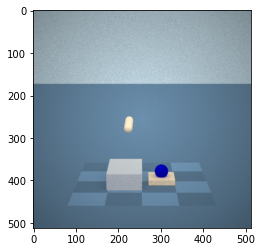

In [3]:
import os
from plb.config.utils import load
x = os.path.join('/home/hza/plasticine/plb/xy/lift.yml')
cfg = load(x)
print(cfg)
from plb.engine.taichi_env import TaichiEnv
env = TaichiEnv(cfg, nn=False, loss=False)

env.initialize()
initial_state = env.get_state()
env.render('plt')


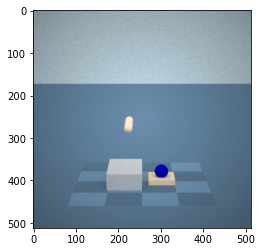

t:  12%|█▏        | 12/100 [00:00<00:00, 111.90it/s, now=None]

animating xx.webm
Moviepy - Building video xx.webm.
Moviepy - Writing video xx.webm



Moviepy - Done !
Moviepy - video ready xx.webm


In [6]:
import tqdm
import numpy as np
env.set_state(**initial_state)
env.render('plt')
env.simulator.primitives[1].xyz_limit[1] = (0.9, 0.9, 0.9)
images = []
for i in tqdm.trange(100):
    env.step(np.random.random(12))
    images.append(env.render('rgb_array', spp=1))

from plb.lang.utils import animate
animate(images, 'xx.webm')

In [7]:
print(env.get_state()['state'][1].mean())

-0.22463602043787084


In [ ]:
print(initial_state['state'][1].mean())

In [9]:
def compute_loss(idx, shape, *args, **kwargs):
    return (shape**2).mean()

env.set_state(**initial_state)
from plb.lang.solver import Solver
solver = Solver(env, output_grid=(), return_dist=True)

env.set_state(**initial_state)
_ = solver.solve(np.random.random((50, 12))*0, compute_loss)

12: 4.7445  4.744:   6%|▋         | 13/200 [00:32<07:54,  2.54s/it]


KeyboardInterrupt: 